In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data=pd.read_csv('fraud_oracle.csv')
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
data.duplicated().sum()

0

In [5]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [6]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Unique values for {col} before encoding: {data[col].unique()}")

Unique values for Month before encoding: ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Unique values for DayOfWeek before encoding: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Unique values for Make before encoding: ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Unique values for AccidentArea before encoding: ['Urban' 'Rural']
Unique values for DayOfWeekClaimed before encoding: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
Unique values for MonthClaimed before encoding: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Unique values for Sex before encoding: ['Female' 'Male']
Unique values for MaritalStatus before encoding: ['Single' 'Married' 'Widow' 'Divorced']
Unique values for Fault before encoding: ['Policy Holder' 'Third Party']
Unique values for 

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=le.fit_transform(data[i])

In [8]:
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,4,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,4,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,1,3,1,1,2,...,3,3,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,4,0,0,0,2,3,0,1996,0


In [9]:
data['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [10]:
y=data['FraudFound_P']
x=data.drop('FraudFound_P',axis=1)

In [11]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [12]:
x

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,4,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,4,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,1,3,1,1,2,...,3,3,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,4,0,0,0,2,3,0,1996,0


In [13]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10);
x_pca=pca.fit_transform(x_scaled)

In [15]:
x_pca

array([[-5.1399962 ,  1.65334305, -1.90720639, ...,  1.25028173,
         0.65966498,  1.70814037],
       [-2.36730916,  1.40282812, -1.92363253, ...,  1.78336735,
         3.24229211,  0.40930456],
       [-0.06515722,  2.65923756, -1.84902736, ...,  0.59279079,
        -0.50086165, -0.5628183 ],
       ...,
       [-1.82897824, -1.70486112,  2.37876099, ..., -0.08885351,
         0.08223477, -0.97584071],
       [-1.02830119, -3.07788226,  2.1378805 , ..., -1.37572766,
         0.49035285,  0.04146924],
       [-1.93706421, -1.63988003,  2.06329436, ..., -0.39178547,
        -0.24040307,  0.78912738]])

In [16]:
x_pca.shape

(15420, 10)

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12336, 10), (3084, 10), (12336,), (3084,))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

0.9325551232166018
[[2872   15]
 [ 193    4]]


In [20]:
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2887
           1       0.21      0.02      0.04       197

    accuracy                           0.93      3084
   macro avg       0.57      0.51      0.50      3084
weighted avg       0.89      0.93      0.91      3084



In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8884565499351491
[[2705  182]
 [ 162   35]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
param = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 0}
rf=RandomForestClassifier(**param)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9364461738002594


In [23]:
confusion_matrix(y_pred,y_test)

array([[2887,  196],
       [   0,    1]], dtype=int64)

In [24]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9361219195849546


In [25]:
confusion_matrix(y_pred,y_test)

array([[2887,  197],
       [   0,    0]], dtype=int64)

In [26]:
!pip install xgboost

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the mode
xgb.fit(x_train, y_train)

# Make predictions
y_pred = xgb.predict(x_test)

# Print accuracy
print(accuracy_score(y_test, y_pred))


0.9361219195849546


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(x_train, y_train)

# Make predictions
y_pred = log_reg.predict(x_test)

# Print accuracy
print(accuracy_score(y_test, y_pred))


0.9361219195849546


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(**param),
    "SVM": SVC(kernel='rbf', C=1, gamma=0.1),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "KNN": KNeighborsClassifier(n_neighbors=5),  # KNN model added
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Logistic Regression added
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)  # Training accuracy
    y_pred_test = model.predict(x_test)    # Testing accuracy
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    results.append({"Model": name, "Train Accuracy": train_acc, "Test Accuracy": test_acc})

# Convert results into a DataFrame
df_results = pd.DataFrame(results)

# Print table
print(df_results)


                 Model  Train Accuracy  Test Accuracy
0        Decision Tree        1.000000       0.884241
1        Random Forest        0.957280       0.936446
2                  SVM        0.941229       0.936122
3              XGBoost        0.941229       0.936122
4                  KNN        0.943742       0.932555
5  Logistic Regression        0.941148       0.936122


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize a list to store evaluation metrics
metrics_results = []

# Compute metrics for each model
for name, model in models.items():
    y_pred_test = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    metrics_results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score": r2
    })

# Convert results into a DataFrame
df_metrics = pd.DataFrame(metrics_results)

# Print table
print(df_metrics)


                 Model       MSE       MAE  R2 Score
0        Decision Tree  0.115759  0.115759 -0.935841
1        Random Forest  0.063554  0.063554 -0.062814
2                  SVM  0.063878  0.063878 -0.068237
3              XGBoost  0.063878  0.063878 -0.068237
4                  KNN  0.067445  0.067445 -0.127885
5  Logistic Regression  0.063878  0.063878 -0.068237


In [106]:
best_model_mse = df_metrics.loc[df_metrics["MSE"].idxmin()]["Model"]
best_model_mae = df_metrics.loc[df_metrics["MAE"].idxmin()]["Model"]
best_model_r2 = df_metrics.loc[df_metrics["R2 Score"].idxmax()]["Model"]
# Print best models based on metrics
print(f"\nModel with Lowest MSE: {best_model_mse}")
print(f"Model with Lowest MAE: {best_model_mae}")
print(f"Model with Highest R² Score: {best_model_r2}")


Model with Lowest MSE: Random Forest
Model with Lowest MAE: Random Forest
Model with Highest R² Score: Random Forest


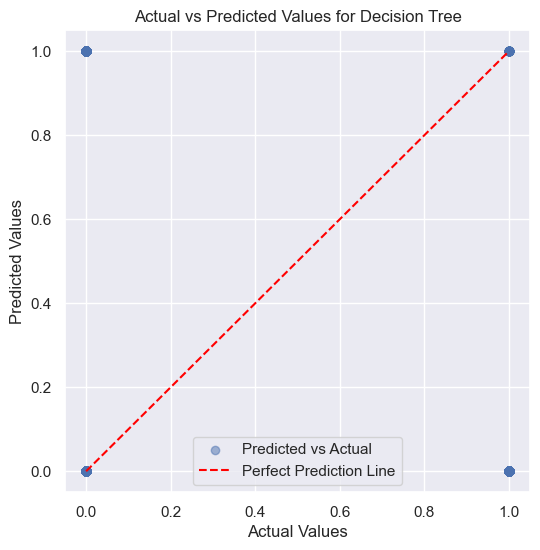

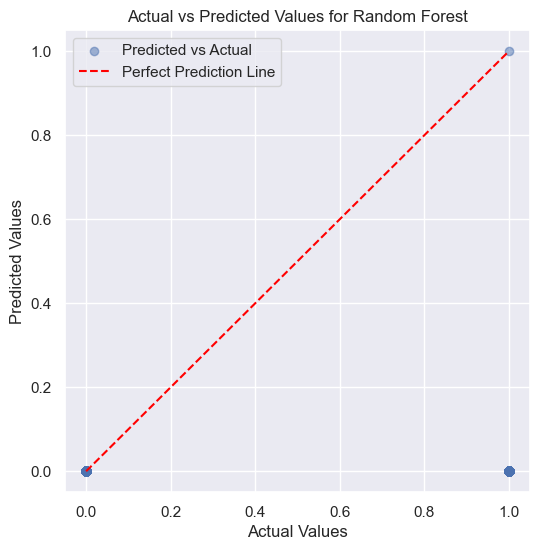

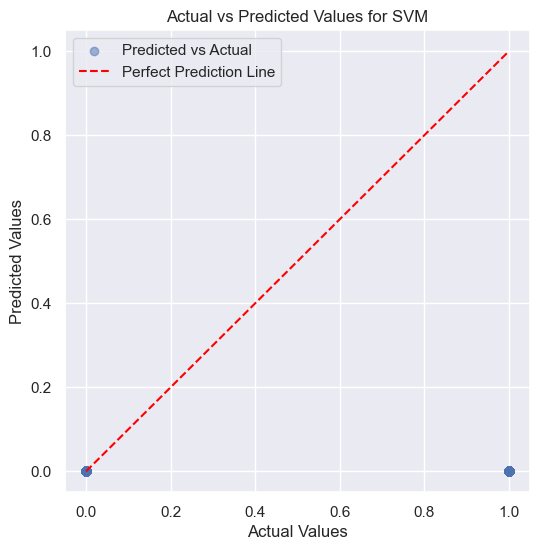

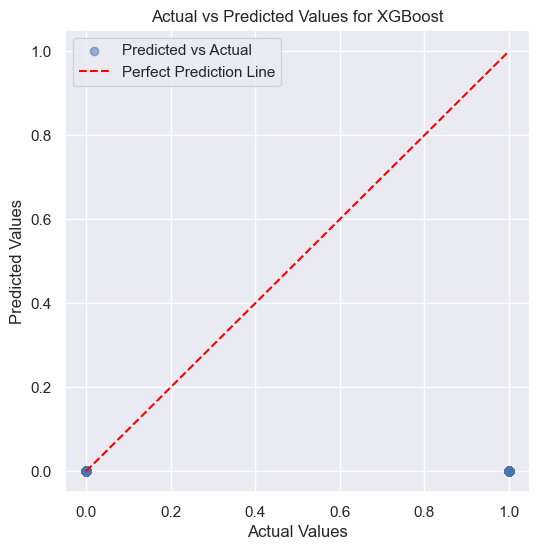

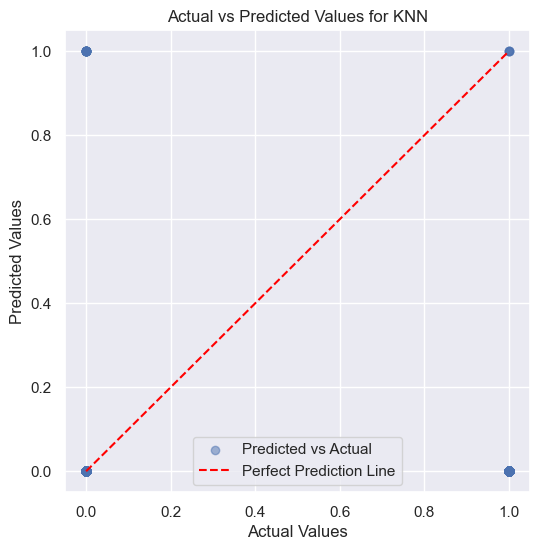

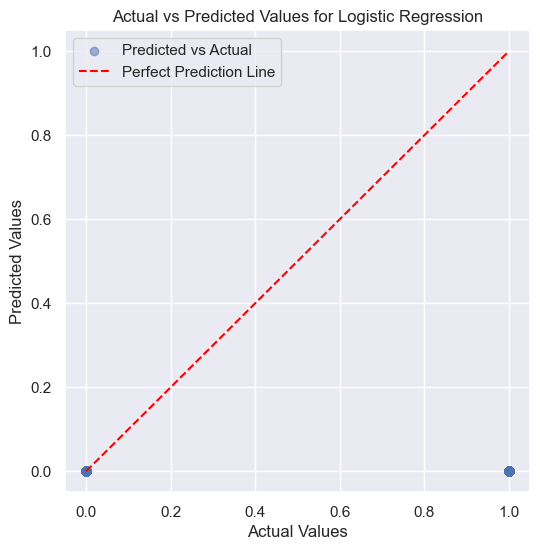

In [108]:
import matplotlib.pyplot as plt

# Plot for each model
for name, model in models.items():
    y_pred_test = model.predict(x_test)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5, label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction Line")
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted Values for {name}")
    plt.legend()
    plt.show()


In [30]:
x

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,4,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,4,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,1,3,1,1,2,...,3,3,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,4,0,0,0,2,3,0,1996,0


In [96]:
# Create a DataFrame with min and max values
min_max_table = pd.DataFrame({"Minimum Value": x.min(), "Maximum Value": x.max()})

# Print the table
print("Feature-wise Minimum and Maximum Values:")
min_max_table)


Feature-wise Minimum and Maximum Values:


,Minimum Value,Maximum Value
Month,0,11
WeekOfMonth,1,5
DayOfWeek,0,6
Make,0,18
AccidentArea,0,1
DayOfWeekClaimed,0,7
MonthClaimed,0,12
WeekOfMonthClaimed,1,5
Sex,0,1
MaritalStatus,0,3


In [94]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Filter data where FraudFound_P is 1
fraudulent_data = data[data['FraudFound_P'] == 1]

# Display all columns of the filtered data
print("All records where FraudFound_P is 1:")
fraudulent_data.head()


All records where FraudFound_P is 1:


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,5,1,2,6,1,6,12,4,1,2,0,0,0,0,5,1,29,9,400,1,3,2,3,7,0,0,0,0,3,3,0,1994,0
52,5,3,3,6,0,7,5,4,1,1,21,0,4,1,5,1,53,4,400,4,3,2,3,2,3,0,0,0,1,3,0,1994,1
53,5,4,2,6,1,7,2,2,1,1,50,0,1,0,0,1,54,13,400,1,3,2,3,6,6,0,0,0,1,3,0,1994,1
94,9,2,4,6,1,1,5,3,1,2,34,0,4,1,5,1,95,7,400,3,3,2,3,5,4,0,0,0,1,3,0,1994,1
96,9,2,0,17,1,6,5,1,1,1,38,0,1,0,0,1,97,7,400,2,3,2,0,5,5,0,0,0,3,3,0,1994,1


In [102]:
import numpy as np
import pandas as pd

# Function to take user input and make a prediction
def predict_fraud():
    # Define feature names based on dataset
    feature_names = x.columns

    # Take user input for each feature
    input_data = []
    print("Enter feature values:")
    for feature in feature_names:
        value = input(f"{feature}: ").strip()  # Strip spaces
        try:
            input_data.append(float(value))  # Convert input to float
        except ValueError:
            print(f"Invalid input for {feature}. Please enter a numerical value.")
            return

    # Convert input data to a Pandas DataFrame with the same feature names
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Apply the same preprocessing steps: scaling and PCA
    input_scaled = scale.transform(input_df)  # Standard scaling
    input_pca = pca.transform(input_scaled)  # PCA transformation

    # Make a prediction using the best model (Random Forest)
    prediction = models["Random Forest"].predict(input_pca)

    # Display the result
    print("✅ The claim is likely to be fraudulent." if prediction[0] == 1 else "✅ The claim is not fraudulent.")

# Call the function to predict fraud
predict_fraud()


Enter feature values:


Month:  9
WeekOfMonth:  2
DayOfWeek:  4
Make:  6
AccidentArea:  1
DayOfWeekClaimed:  1
MonthClaimed:  5
WeekOfMonthClaimed:  3
Sex:  1
MaritalStatus:  2
Age:  34
Fault:  0
PolicyType:  4
VehicleCategory:  1
VehiclePrice:  5
PolicyNumber:  95
RepNumber:  7
Deductible:  400
DriverRating:  3
Days_Policy_Accident:  3
Days_Policy_Claim:  2
PastNumberOfClaims:  3
AgeOfVehicle:  5
AgeOfPolicyHolder:  4
PoliceReportFiled:  0
WitnessPresent:  0
AgentType:  0
NumberOfSuppliments:  1
AddressChange_Claim:  3
NumberOfCars:  0
Year:  994
BasePolicy:  1


✅ The claim is not fraudulent.
